0
東京688て84-70


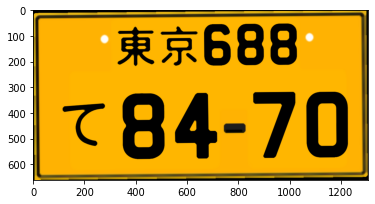

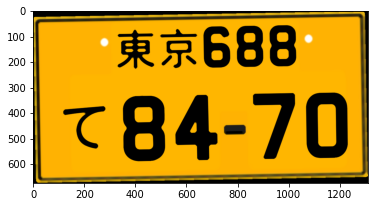

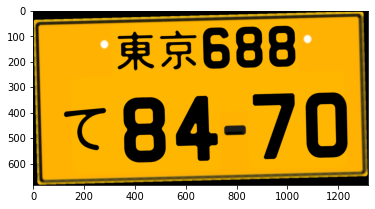

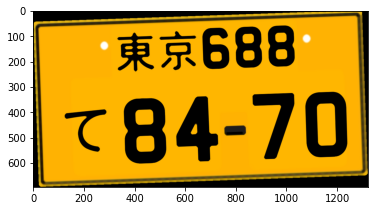

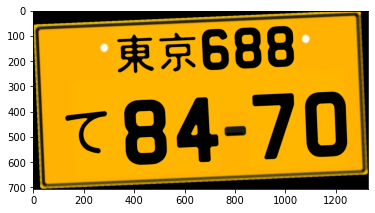

In [60]:
from PIL  import Image,ImageFont,ImageDraw
import numpy as np
from pylab import *
import cv2
from scipy import ndimage

def tfactor(img):
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV);#Increase the noise of saturation lighting
    hsv[:,:,0] = hsv[:,:,0]*(0.8+ np.random.random()*0.2);
    hsv[:,:,1] = hsv[:,:,1]*(0.3+ np.random.random()*0.7);
    hsv[:,:,2] = hsv[:,:,2]*(0.2+ np.random.random()*0.8);
    img = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR);
    return img  


def makecarnum(str):
    #im = cv2.cvtColor(Image.open('22.jpg'), cv2.COLOR_BGR2RGB)
    im = Image.open('22.jpg')  #model.jpg
    #im = Image.new('RGB', im.size, (255, 255, 255))
    #im.paste(im, None)
    draw = ImageDraw.Draw(im)
    
    fontchinese = ImageFont.truetype('simhei.ttf', int(im.size[1]*43/165))
    font = ImageFont.truetype('font1.ttf', int(im.size[1]*60/165))
    fontchinese2 = ImageFont.truetype('simhei.ttf', int(im.size[1]*60/165))
    fonthiphen = ImageFont.truetype('font.ttf', int(im.size[1]*70/165))
    font2 = ImageFont.truetype('font1.ttf', int(im.size[1]*95/165))
    
    xc,yc=(int(im.size[0]*80/330), int(im.size[1]*25/330))
    x, y = (int(im.size[0]*10/330), int(im.size[0]*40/165))
    x2,y2=(int(im.size[0]*85/330), int(im.size[0]*40/165))
    xhp, yhp = (int(im.size[0]*75/330), int(im.size[0]*30/165))

    draw.text((xc,yc), str[0:2], font=fontchinese,fill = "black")
    width, height = fontchinese.getsize(str[0])
    #print(width,height)
    draw.text((xc+width*2, yc), str[2:5], font=font,fill = "black")

    draw.text((x+40, y), str[5], font=fontchinese2,fill = "black")

    
    draw.text((x2-10, y2), str[6:8], font=font2, fill="black")
    thickness=3
    draw.text((x2+400, y2-35), str[8], font=fonthiphen, fill="black")
    draw.text((x2+500, y2), str[9:], font=font2, fill="black")
    im = np.array(im)
    xc=0.5
    for i in range(5):
        #anti-clockwise rotation angle in degree
        im1 = ndimage.rotate(im, xc)
        xc=xc+0.5
       
        #imshow(im1)
        #show()
        
        #clockwise rotation
        #im1 = ndimage.rotate(im, -xc)
        
        
        # median Blurring
        im3 = cv2.medianBlur(im1,15)
        
        # Gaussian Blurring
        # Again, you can change the kernel size
        #im3 = cv2.GaussianBlur(im1, (25,25),cv2.BORDER_DEFAULT)
        
        # Add the Gaussian noise to the image
        #gauss = np.random.normal(0,0.5,im3.size)
        #gauss = gauss.reshape(im3.shape[0],im3.shape[1],im3.shape[2]).astype('uint8')
        
        #im4 = cv2.add(im3,gauss)
        #im4 = im3 + im3 * gauss 
        
        #im5=tfactor(im)
        imshow(im3)
        show()
        img = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
    
    
        cv2.imwrite(str+i.__str__()+'.png', img)
    



for x in range(1):
    num=[ u"0", u"2", u"3", u"4", u"5", u"6", u"7", u"8", u"9"]
    areachars=[u"森",u"森"]
    codechars=[u"あ",u"い",u"う",u"え",u"お",u"か",u"き",u"く",u"け",u"こ",u"さ",u"し",u"す",u"せ",u"そ",u"た",u"ち",u"つ",u"て",u"と",u"な",u"に",u"ぬ",
           u"ね",u"の",u"は",u"ひ",u"ふ",u"へ",u"ほ",u"ま",u"み",u"む",u"め",u"も",u"や",u"ゆ",u"よ",u"ら",u"り",u"る",u"れ",u"ろ",u"わ",u"を"]
    print(np.random.randint(0, 2))
    str=''
    for i in range(10):
        if i==0:
            str="東京"
        elif i<4:
            str = str +num[np.random.randint(5, 9)]
        elif i < 5:
            str = str + codechars[np.random.randint(0, len(codechars))]
        elif i == 7:
            str = str + "-"
        else:
            str = str + num[np.random.randint(0, len(num))]
    print(str)
    makecarnum(str)

In [13]:
#